# ML 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from IPython.display import SVG

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv('Complete.csv')

/Users/vedparanjape/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,unique_titd,tire.country_fk,section.section_fk,tiregroup.testplan_fk,mileage,date,tacho,td_min,td_mean,wheelposition,...,td_mean_1,rimtype_1,tisize_rim_1,tisize_width_1,tisize_radial_1,tisize_ratio_1,numspikes_na_1,finding_1,td_min_b,td_mean_b
0,uh02480xxxxxg3poc3bg00b10_uh02480xxxxx4mrovkfg...,kaykxxxxxxxx2rsgrh2e00n00,uh02480xxxxxg3poc3bg00a10,uh02480xxxxxjnt47iag00000,0.0,7/1/2010,NaN,15.0,15.24000,NaN,...,15.240000,Steel,22.5,315.0,R,80,1,test finished,0,0
1,uh02480xxxxxg3poc3bg00b10_uh06144xxxxx6o4fnpig...,kaykxxxxxxxx2rsgrh2e00n00,uh02480xxxxxg3poc3bg00a10,NaN,16937.0,1/9/2011,697268.0,13.7,NaN,NaN,...,9.366667,Steel,22.5,315.0,R,65,1,test finished,0,0
2,uh02480xxxxxg3poc3bg00b10_uh06144xxxxx0uslnrlg...,kaykxxxxxxxx2rsgrh2e00n00,uh02480xxxxxg3poc3bg00a10,uh02480xxxxxjnt47iag00000,NaN,3/27/2011,NaN,12.8,13.20000,NaN,...,13.200000,Steel,22.5,315.0,R,65,1,test finished,0,0
3,uh02480xxxxxg3poc3bg00b10_uh06144xxxxxzpqltxpg...,NaN,uh02480xxxxxg3poc3bg00a10,uh02480xxxxxjnt47iag00000,78229.0,7/10/2011,NaN,11.3,11.69500,NaN,...,11.695000,Steel,22.5,315.0,R,80,1,test finished,0,0
4,uh02480xxxxxg3poc3bg00b10_uh06144xxxxx62epzusg...,NaN,uh02480xxxxxg3poc3bg00a10,uh02480xxxxxjnt47iag00000,104422.0,9/21/2011,784753.0,10.3,10.66875,NaN,...,10.668750,Steel,22.5,315.0,R,80,1,test finished,0,0


In [5]:
df.columns

Index(['unique_titd', 'tire.country_fk', 'section.section_fk',
       'tiregroup.testplan_fk', 'mileage', 'date', 'tacho', 'td_min',
       'td_mean', 'wheelposition', 'rimtype', 'tisize_rim', 'tisize_width',
       'tisize_radial', 'tisize_ratio', 'numspikes_na', 'finding', 'reason',
       'wheelposition_1', 'mileage_1', 'tacho_1', 'td_min_1', 'td_mean_1',
       'rimtype_1', 'tisize_rim_1', 'tisize_width_1', 'tisize_radial_1',
       'tisize_ratio_1', 'numspikes_na_1', 'finding_1', 'td_min_b',
       'td_mean_b'],
      dtype='object')

In [6]:
df.describe()

,mileage,tacho,td_min,td_mean,tisize_rim,tisize_width,tisize_ratio,numspikes_na,mileage_1,tacho_1,td_min_1,td_mean_1,tisize_rim_1,tisize_width_1,tisize_ratio_1,numspikes_na_1,td_min_b,td_mean_b
count,6.641920e+05,5.547240e+05,666556.000000,666210.000000,666285.000000,666833.000000,666497.000000,666400.000000,7.405780e+05,7.405780e+05,740578.000000,740578.000000,740578.000000,740578.000000,740578.000000,740578.000000,740578.000000,740578.000000
mean,5.801917e+04,3.043679e+05,9.750815,10.713031,20.250947,285.188112,69.925273,0.934970,5.530967e+04,2.853887e+05,9.625794,10.577831,20.476567,286.165156,69.432592,0.941484,0.033073,0.003681
std,7.293494e+04,3.032992e+05,7.599536,7.352813,12.156476,76.952616,13.345511,0.246579,6.953176e+04,2.645369e+05,7.219500,6.985597,11.550390,73.079867,12.746397,0.234718,0.178827,0.060559
min,-2.309810e+05,0.000000e+00,0.000000,-0.100000,2.000000,100.000000,30.000000,0.000000,-2.309810e+05,0.000000e+00,0.000000,-0.100000,2.000000,100.000000,30.000000,0.000000,0.000000,0.000000
25%,4.888000e+03,1.068600e+05,5.660000,6.802000,16.000000,225.000000,60.000000,1.000000,8.245000e+03,1.437462e+05,5.980000,7.073334,16.000000,225.000000,60.000000,1.000000,0.000000,0.000000
50%,3.175000e+04,2.287410e+05,8.500000,9.366667,22.500000,295.000000,65.000000,1.000000,3.175000e+04,2.287410e+05,8.500000,9.366667,22.500000,295.000000,65.000000,1.000000,0.000000,0.000000
75%,8.325575e+04,4.264660e+05,12.800000,13.565000,22.500000,315.000000,80.000000,1.000000,7.452700e+04,3.458170e+05,12.220000,13.065350,22.500000,315.000000,80.000000,1.000000,0.000000,0.000000
max,1.323980e+06,1.046440e+07,114.000000,114.000000,470.000000,1078.000000,305.000000,1.000000,1.323980e+06,1.046440e+07,114.000000,114.000000,470.000000,1078.000000,305.000000,1.000000,1.000000,1.000000


In [4]:
df=df.rename(index=str, columns={"tire.country_fk": "country",})
df=df.rename(index=str, columns={"section.section_fk": "section",})

In [5]:
df.country=df.country.astype('category')
df.country=df['country'].cat.codes
df.section=df.section.astype('category')
df.section=df['section'].cat.codes
df.wheelposition=df.wheelposition.astype('category')
df.wheelposition=df['wheelposition'].cat.codes
df.rimtype=df.rimtype.astype('category')
df.rimtype=df['rimtype'].cat.codes
df.tisize_radial=df.tisize_radial.astype('category')
df.tisize_radial=df['tisize_radial'].cat.codes
df.finding=df.finding.astype('category')
df.finding=df['finding'].cat.codes

In [6]:
df.describe

<bound method NDFrame.describe of                                               unique_titd  country  section  \
0       uh02480xxxxxg3poc3bg00b10_uh02480xxxxx4mrovkfg...       23   115713   
1       uh02480xxxxxg3poc3bg00b10_uh06144xxxxx6o4fnpig...       23   115713   
2       uh02480xxxxxg3poc3bg00b10_uh06144xxxxx0uslnrlg...       23   115713   
3       uh02480xxxxxg3poc3bg00b10_uh06144xxxxxzpqltxpg...       -1   115713   
4       uh02480xxxxxg3poc3bg00b10_uh06144xxxxx62epzusg...       -1   115713   
5       uh02480xxxxxg3poc3bg00910_uh02480xxxxxe8jpvkfg...       23   115711   
6       uh02480xxxxxg3poc3bg00910_uh06144xxxxxhxu3emfg...       23   115711   
7       uh02480xxxxxg3poc3bg00910_uh06144xxxxxxngs4tlg...       23   115711   
8       uh02480xxxxxg3poc3bg00910_uh06144xxxxxgf04v9tg...       23   115711   
9       uh02480xxxxxg3poc3bg00510_uh02480xxxxxe8jpvkfg...       23   115707   
10      uh02480xxxxxg3poc3bg00510_uh06144xxxxx26w0lnfg...       23   115707   
11      uh02480xxx

In [7]:
df = df.drop(columns=['country','section','tiregroup.testplan_fk', 'mileage', 'date', 'tacho', 'td_min',
       'td_mean', 'wheelposition', 'rimtype', 'tisize_rim', 'tisize_width',
       'tisize_radial', 'tisize_ratio', 'numspikes_na', 'finding', 'reason','td_min_b',
       'td_mean_b'])

In [8]:
df.columns

Index(['unique_titd', 'wheelposition_1', 'mileage_1', 'tacho_1', 'td_min_1',
       'td_mean_1', 'rimtype_1', 'tisize_rim_1', 'tisize_width_1',
       'tisize_radial_1', 'tisize_ratio_1', 'numspikes_na_1', 'finding_1'],
      dtype='object')

In [9]:
df['finding_1'].value_counts()

test finished                                      355341
worn                                               101282
due to IW                                           53746
as a partner                                        42852
cancelled                                           30644
tire lost                                           26392
tread damage                                        25418
worn (from the customers point of view)             19369
tread endurance                                     14585
tread finding (chipping and chunking/mini cuts)     14385
sidewall damage                                      9957
as set/axle worn                                     7778
reason unknown, tire must be analyzed                4902
sidewall finding                                     4305
due to the time of the year (autumn, winter)         3443
Vehicle sold                                         3065
unknown                                              2717
bead finding  

In [10]:
df = df.drop(columns=['unique_titd'])

In [11]:
df.wheelposition_1=df.wheelposition_1.astype('category')
df.wheelposition_1=df['wheelposition_1'].cat.codes
df.rimtype_1=df.rimtype_1.astype('category')
df.rimtype_1=df['rimtype_1'].cat.codes
df.tisize_radial_1=df.tisize_radial_1.astype('category')
df.tisize_radial_1=df['tisize_radial_1'].cat.codes
# df.finding_1=df.finding_1.astype('category')
# df.finding_1=df['finding_1'].cat.codes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740578 entries, 0 to 740577
Data columns (total 12 columns):
wheelposition_1    740578 non-null int8
mileage_1          740578 non-null float64
tacho_1            740578 non-null float64
td_min_1           740578 non-null float64
td_mean_1          740578 non-null float64
rimtype_1          740578 non-null int8
tisize_rim_1       740578 non-null float64
tisize_width_1     740578 non-null float64
tisize_radial_1    740578 non-null int8
tisize_ratio_1     740578 non-null int64
numspikes_na_1     740578 non-null int64
finding_1          740578 non-null object
dtypes: float64(6), int64(2), int8(3), object(1)
memory usage: 58.6+ MB


In [13]:
df.head()

,wheelposition_1,mileage_1,tacho_1,td_min_1,td_mean_1,rimtype_1,tisize_rim_1,tisize_width_1,tisize_radial_1,tisize_ratio_1,numspikes_na_1,finding_1
0,0,0.0,228741.0,15.0,15.240000,4,22.5,315.0,1,80,1,test finished
1,0,16937.0,697268.0,13.7,9.366667,4,22.5,315.0,1,65,1,test finished
2,0,31750.0,228741.0,12.8,13.200000,4,22.5,315.0,1,65,1,test finished
3,0,78229.0,228741.0,11.3,11.695000,4,22.5,315.0,1,80,1,test finished
4,0,104422.0,784753.0,10.3,10.668750,4,22.5,315.0,1,80,1,test finished


In [14]:
df.columns

Index(['wheelposition_1', 'mileage_1', 'tacho_1', 'td_min_1', 'td_mean_1',
       'rimtype_1', 'tisize_rim_1', 'tisize_width_1', 'tisize_radial_1',
       'tisize_ratio_1', 'numspikes_na_1', 'finding_1'],
      dtype='object')

In [15]:
features = df[['wheelposition_1', 'mileage_1', 'tacho_1', 'td_min_1', 'td_mean_1',
       'rimtype_1', 'tisize_rim_1', 'tisize_width_1', 'tisize_radial_1',
       'tisize_ratio_1', 'numspikes_na_1']]
target = df[['finding_1']]

In [16]:
target.head()

,finding_1
0,test finished
1,test finished
2,test finished
3,test finished
4,test finished


In [17]:
from sklearn.model_selection import train_test_split
# Split in the train and test dataset
X_train, X_test, T_train, T_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn import metrics

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


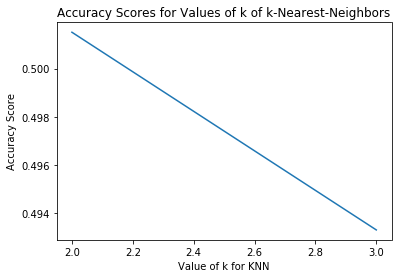

In [23]:
#increase range for eg 1 to 10
k_range = list(range(2,4))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, T_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(T_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [37]:
# can increase neighbours
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, T_train)
y_pred = knn.predict(X_test)
scores.append(metrics.accuracy_score(T_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
scores

[0.5015055767101461, 0.49330254665262363, 0.49330254665262363]

In [26]:
from sklearn.neural_network import MLPClassifier

In [41]:
# alpha-learning rate problem
universal_model = MLPClassifier(hidden_layer_sizes=(11,50,50), max_iter=50, alpha=0.000000000000001,
                     solver='lbfgs', verbose=10,  random_state=21)

In [42]:
universal_model.fit(X_train, T_train)
y_pred = universal_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:

accuracy_score(X_train, T_train)



ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [48]:
cm = confusion_matrix(T_train, X_train)
cm

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [36]:
sns.heatmap(cm, center=True)
plt.show()

NameError: name 'cm' is not defined

# Clustering

In [22]:
from sklearn.cluster import KMeans

In [27]:
# can increase number of clusters
kmeans = KMeans(n_clusters=6, random_state=0)
clusters = kmeans.fit_predict(X_train)

In [28]:
kmeans.cluster_centers_

array([[7.99769850e-02, 9.33876216e+04, 4.35979650e+05, 8.61153186e+00,
        9.77787092e+00, 3.63551686e+00, 2.10944048e+01, 3.00593634e+02,
        9.99880583e-01, 7.02886640e+01, 9.68604121e-01],
       [1.56127965e-01, 4.00735904e+04, 7.45356330e+04, 8.74442429e+00,
        9.72466037e+00, 3.56336577e+00, 1.99560389e+01, 2.74209782e+02,
        9.95020034e-01, 6.87242002e+01, 9.44285442e-01],
       [2.77555756e-16, 7.22804444e+04, 9.77900713e+06, 8.99157407e+00,
        1.01368364e+01, 4.00000000e+00, 2.22037037e+01, 3.13375000e+02,
        1.00000000e+00, 8.30555556e+01, 1.00000000e+00],
       [7.15747664e-02, 9.83140272e+04, 7.16827783e+05, 9.22953971e+00,
        1.03679953e+01, 3.70067076e+00, 2.19182017e+01, 3.13299491e+02,
        1.00000000e+00, 7.14510507e+01, 9.89948730e-01],
       [1.87330100e-01, 4.04723531e+04, 2.31536735e+05, 1.05708181e+01,
        1.13875039e+01, 3.51306621e+00, 2.01952868e+01, 2.82001549e+02,
        9.94584657e-01, 6.90060019e+01, 9.19635448e-

In [29]:
labels = kmeans.predict(X_test)
centroids = kmeans.cluster_centers_

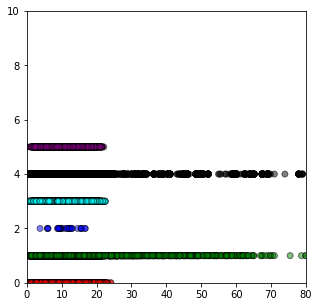

In [ ]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    data = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_test.values)


In [61]:
pca.explained_variance_ratio_

array([0.94124757, 0.05875236])

In [40]:
pca_result

array([[ -59595.54266083],
       [-177734.70159343],
       [-212505.68107749],
       ...,
       [-278814.24276861],
       [-144486.06519104],
       [ -56089.93947965]])

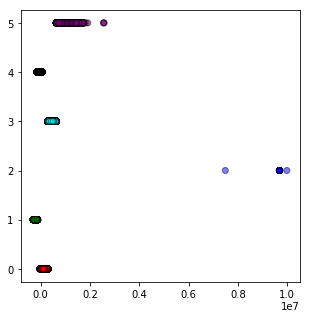

In [41]:
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b',4:'cyan',5:'black',6:'purple'}
colors = map(lambda x: colmap[x+1], labels)
colors=list(colors)
plt.scatter(pca_result, labels, color=colors, alpha=0.5, edgecolor='k')
# for idx, centroid in enumerate(centroids):
#     plt.scatter(*centroid, color=colors[idx+1])
# plt.xlim(0, 80)
# plt.ylim(0, 10)
plt.show()


In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result_train = pca.fit_transform(X_test
                                     .values)

pca_result_train.shape
pca_result_train0 = pca_result_train

array([[ -59595.54266083,  -29302.10599444],
       [-177734.70159343,   61820.67855486],
       [-212505.68107749,   -8253.09913568],
       ...,
       [-278814.24276861,  -25364.80410951],
       [-144486.06519104,  -38745.94854026],
       [ -56089.93947965,  -24446.43031399]])

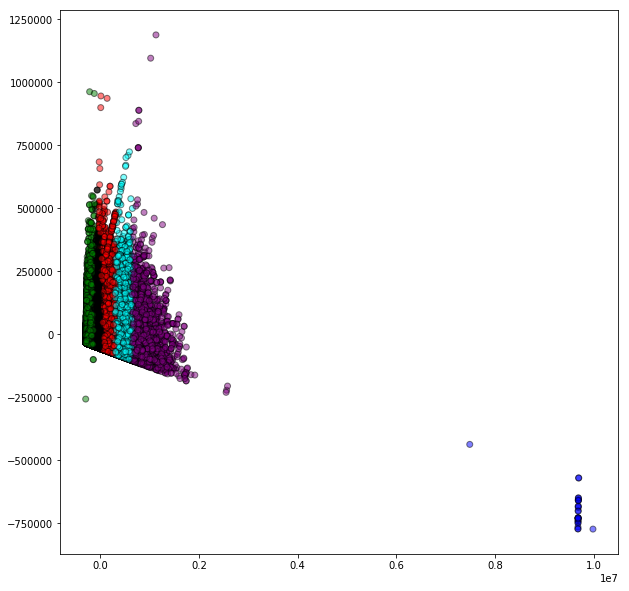

In [62]:
fig = plt.figure(figsize=(10, 10))
colmap = {1: 'r', 2: 'g', 3: 'b',4:'cyan',5:'black',6:'purple'}
colors = map(lambda x: colmap[x+1], labels)
colors=list(colors)
plt.scatter(pca_result_train[:,0],pca_result_train[:,1] ,color=colors,alpha=0.5, edgecolor='k')
# for idx, centroid in enumerate(centroids):
#     plt.scatter(*centroid, color=colors[idx+1])
# plt.xlim(0, 80)
# plt.ylim(0, 10)
plt.show()
plt.savefig('filename.jpg')